In [66]:
# download annual historical data for the stock
# calculate the volatility of annualised return of the stock
import pandas as pd
from math import sqrt
import numpy as np
from scipy.stats import norm
import seaborn as sns

df = pd.read_csv("SPY.csv")
df = df.sort_values(by="Date")
df = df.dropna()
# calculate returns
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

# get options data from yahoo finance for today 08/17 expiry 08/18
r = pd.read_html('<table class="calls W(100%) Pos(r) Bd(0) Pt(0) list-options"><thead><tr class="C($tertiaryColor)"><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(start) Pstart(10px) C($tertiaryColor) Cur(p)"><span>Contract Name</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Last Trade Date</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(c) Pstart(7px) C($tertiaryColor) C($primaryColor) Fw(500)! Cur(p)"><span>Strike</span><svg class="Va(m)! W(14px) H(14px) Fill($primaryColor)! Stk($primaryColor)! Pt(1px) Pos(a) Cur(p)" width="48" style="fill:#000;stroke:#000;stroke-width:0;vertical-align:bottom" height="48" viewBox="0 0 48 48" data-icon="caret-up"><path d="M24.21 16.03L11.48 28.76c-.78.78-.78 2.047 0 2.827.78.78 2.048.78 2.83 0l9.898-9.9 9.9 9.9c.78.78 2.047.78 2.827 0 .78-.78.78-2.047 0-2.828L24.21 16.03z"></path></svg></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Last Price</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Bid</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Ask</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Change</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>% Change</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Volume</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) C($tertiaryColor) Cur(p)"><span>Open Interest</span></th><th class="Va(b) Py(4px) Fw(400) Fz(xs) Ta(end) Pstart(7px) Pend(6px) C($tertiaryColor) Cur(p)"><span>Implied Volatility</span></th></tr></thead><tbody><tr class="data-row0 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00195000?p=SPY230818C00195000" class="Fz(s) Ell C($linkColor)">SPY230818C00195000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 1:23PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=195&amp;straddle=false" data-symbol="SPY">195.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">244.49</td><td class="data-col4 Ta(end) Pstart(7px)">241.19</td><td class="data-col5 Ta(end) Pstart(7px)">241.36</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.02</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.42%</span></td><td class="data-col8 Ta(end) Pstart(7px)">6</td><td class="data-col9 Ta(end) Pstart(7px)">105</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">554.69%</td></tr><tr class="data-row1 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00200000?p=SPY230818C00200000" class="Fz(s) Ell C($linkColor)">SPY230818C00200000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:02PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=200&amp;straddle=false" data-symbol="SPY">200.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">236.01</td><td class="data-col4 Ta(end) Pstart(7px)">236.19</td><td class="data-col5 Ta(end) Pstart(7px)">236.36</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.34</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.21%</span></td><td class="data-col8 Ta(end) Pstart(7px)">23</td><td class="data-col9 Ta(end) Pstart(7px)">60</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">539.06%</td></tr><tr class="data-row2 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00205000?p=SPY230818C00205000" class="Fz(s) Ell C($linkColor)">SPY230818C00205000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:54PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=205&amp;straddle=false" data-symbol="SPY">205.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">231.99</td><td class="data-col4 Ta(end) Pstart(7px)">231.19</td><td class="data-col5 Ta(end) Pstart(7px)">231.37</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.21</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.20%</span></td><td class="data-col8 Ta(end) Pstart(7px)">6</td><td class="data-col9 Ta(end) Pstart(7px)">11</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">529.69%</td></tr><tr class="data-row3 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00210000?p=SPY230818C00210000" class="Fz(s) Ell C($linkColor)">SPY230818C00210000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=210&amp;straddle=false" data-symbol="SPY">210.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">226.81</td><td class="data-col4 Ta(end) Pstart(7px)">226.20</td><td class="data-col5 Ta(end) Pstart(7px)">226.37</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.57</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.98%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">11</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">514.06%</td></tr><tr class="data-row4 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00215000?p=SPY230818C00215000" class="Fz(s) Ell C($linkColor)">SPY230818C00215000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=215&amp;straddle=false" data-symbol="SPY">215.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">221.68</td><td class="data-col4 Ta(end) Pstart(7px)">221.20</td><td class="data-col5 Ta(end) Pstart(7px)">221.37</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.93</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.61%</span></td><td class="data-col8 Ta(end) Pstart(7px)">7</td><td class="data-col9 Ta(end) Pstart(7px)">15</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">498.44%</td></tr><tr class="data-row5 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00220000?p=SPY230818C00220000" class="Fz(s) Ell C($linkColor)">SPY230818C00220000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=220&amp;straddle=false" data-symbol="SPY">220.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">216.74</td><td class="data-col4 Ta(end) Pstart(7px)">216.20</td><td class="data-col5 Ta(end) Pstart(7px)">216.37</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.79</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.72%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">9</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">482.81%</td></tr><tr class="data-row6 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00225000?p=SPY230818C00225000" class="Fz(s) Ell C($linkColor)">SPY230818C00225000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:16PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=225&amp;straddle=false" data-symbol="SPY">225.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">211.14</td><td class="data-col4 Ta(end) Pstart(7px)">211.21</td><td class="data-col5 Ta(end) Pstart(7px)">211.38</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.99</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.76%</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">15</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">375.00%</td></tr><tr class="data-row7 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00230000?p=SPY230818C00230000" class="Fz(s) Ell C($linkColor)">SPY230818C00230000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=230&amp;straddle=false" data-symbol="SPY">230.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">206.62</td><td class="data-col4 Ta(end) Pstart(7px)">206.21</td><td class="data-col5 Ta(end) Pstart(7px)">206.38</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.16</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.44%</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">9</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">362.50%</td></tr><tr class="data-row8 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00235000?p=SPY230818C00235000" class="Fz(s) Ell C($linkColor)">SPY230818C00235000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=235&amp;straddle=false" data-symbol="SPY">235.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">201.67</td><td class="data-col4 Ta(end) Pstart(7px)">201.21</td><td class="data-col5 Ta(end) Pstart(7px)">201.38</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.07</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.39%</span></td><td class="data-col8 Ta(end) Pstart(7px)">1</td><td class="data-col9 Ta(end) Pstart(7px)">17</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">350.00%</td></tr><tr class="data-row9 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00240000?p=SPY230818C00240000" class="Fz(s) Ell C($linkColor)">SPY230818C00240000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:16PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=240&amp;straddle=false" data-symbol="SPY">240.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">196.15</td><td class="data-col4 Ta(end) Pstart(7px)">196.21</td><td class="data-col5 Ta(end) Pstart(7px)">196.38</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.96</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.98%</span></td><td class="data-col8 Ta(end) Pstart(7px)">3</td><td class="data-col9 Ta(end) Pstart(7px)">7</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">337.50%</td></tr><tr class="data-row10 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00245000?p=SPY230818C00245000" class="Fz(s) Ell C($linkColor)">SPY230818C00245000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:16PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=245&amp;straddle=false" data-symbol="SPY">245.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">191.47</td><td class="data-col4 Ta(end) Pstart(7px)">191.22</td><td class="data-col5 Ta(end) Pstart(7px)">191.39</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.93</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.51%</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">8</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">353.13%</td></tr><tr class="data-row11 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00250000?p=SPY230818C00250000" class="Fz(s) Ell C($linkColor)">SPY230818C00250000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 12:28PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=250&amp;straddle=false" data-symbol="SPY">250.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">190.45</td><td class="data-col4 Ta(end) Pstart(7px)">186.22</td><td class="data-col5 Ta(end) Pstart(7px)">186.39</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.70</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.88%</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">18</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">340.63%</td></tr><tr class="data-row12 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00255000?p=SPY230818C00255000" class="Fz(s) Ell C($linkColor)">SPY230818C00255000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=255&amp;straddle=false" data-symbol="SPY">255.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">181.76</td><td class="data-col4 Ta(end) Pstart(7px)">181.22</td><td class="data-col5 Ta(end) Pstart(7px)">181.39</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.88</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.13%</span></td><td class="data-col8 Ta(end) Pstart(7px)">5</td><td class="data-col9 Ta(end) Pstart(7px)">7</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">331.25%</td></tr><tr class="data-row13 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00260000?p=SPY230818C00260000" class="Fz(s) Ell C($linkColor)">SPY230818C00260000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=260&amp;straddle=false" data-symbol="SPY">260.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">176.35</td><td class="data-col4 Ta(end) Pstart(7px)">176.23</td><td class="data-col5 Ta(end) Pstart(7px)">176.40</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.04</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.24%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">6</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">332.81%</td></tr><tr class="data-row14 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00265000?p=SPY230818C00265000" class="Fz(s) Ell C($linkColor)">SPY230818C00265000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:02PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=265&amp;straddle=false" data-symbol="SPY">265.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">171.17</td><td class="data-col4 Ta(end) Pstart(7px)">171.23</td><td class="data-col5 Ta(end) Pstart(7px)">171.40</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.50</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.66%</span></td><td class="data-col8 Ta(end) Pstart(7px)">4</td><td class="data-col9 Ta(end) Pstart(7px)">6</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">321.88%</td></tr><tr class="data-row15 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00270000?p=SPY230818C00270000" class="Fz(s) Ell C($linkColor)">SPY230818C00270000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:57PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=270&amp;straddle=false" data-symbol="SPY">270.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">166.68</td><td class="data-col4 Ta(end) Pstart(7px)">166.23</td><td class="data-col5 Ta(end) Pstart(7px)">166.40</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.41</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">29</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">309.38%</td></tr><tr class="data-row16 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00275000?p=SPY230818C00275000" class="Fz(s) Ell C($linkColor)">SPY230818C00275000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:34PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=275&amp;straddle=false" data-symbol="SPY">275.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">161.41</td><td class="data-col4 Ta(end) Pstart(7px)">161.24</td><td class="data-col5 Ta(end) Pstart(7px)">161.41</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.66</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.39%</span></td><td class="data-col8 Ta(end) Pstart(7px)">7</td><td class="data-col9 Ta(end) Pstart(7px)">13</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">309.38%</td></tr><tr class="data-row17 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00280000?p=SPY230818C00280000" class="Fz(s) Ell C($linkColor)">SPY230818C00280000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:35PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=280&amp;straddle=false" data-symbol="SPY">280.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">156.49</td><td class="data-col4 Ta(end) Pstart(7px)">156.24</td><td class="data-col5 Ta(end) Pstart(7px)">156.41</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.33</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.89%</span></td><td class="data-col8 Ta(end) Pstart(7px)">6</td><td class="data-col9 Ta(end) Pstart(7px)">11</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">296.88%</td></tr><tr class="data-row18 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00285000?p=SPY230818C00285000" class="Fz(s) Ell C($linkColor)">SPY230818C00285000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=285&amp;straddle=false" data-symbol="SPY">285.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">151.61</td><td class="data-col4 Ta(end) Pstart(7px)">151.24</td><td class="data-col5 Ta(end) Pstart(7px)">151.41</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.82</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.08%</span></td><td class="data-col8 Ta(end) Pstart(7px)">5</td><td class="data-col9 Ta(end) Pstart(7px)">17</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">285.94%</td></tr><tr class="data-row19 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00290000?p=SPY230818C00290000" class="Fz(s) Ell C($linkColor)">SPY230818C00290000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=290&amp;straddle=false" data-symbol="SPY">290.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">146.40</td><td class="data-col4 Ta(end) Pstart(7px)">146.25</td><td class="data-col5 Ta(end) Pstart(7px)">146.41</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.80</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.17%</span></td><td class="data-col8 Ta(end) Pstart(7px)">5</td><td class="data-col9 Ta(end) Pstart(7px)">17</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">279.69%</td></tr><tr class="data-row20 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00295000?p=SPY230818C00295000" class="Fz(s) Ell C($linkColor)">SPY230818C00295000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=295&amp;straddle=false" data-symbol="SPY">295.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">141.47</td><td class="data-col4 Ta(end) Pstart(7px)">141.25</td><td class="data-col5 Ta(end) Pstart(7px)">141.42</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.64</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.51%</span></td><td class="data-col8 Ta(end) Pstart(7px)">84</td><td class="data-col9 Ta(end) Pstart(7px)">86</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">271.88%</td></tr><tr class="data-row21 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00300000?p=SPY230818C00300000" class="Fz(s) Ell C($linkColor)">SPY230818C00300000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=300&amp;straddle=false" data-symbol="SPY">300.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">137.04</td><td class="data-col4 Ta(end) Pstart(7px)">136.25</td><td class="data-col5 Ta(end) Pstart(7px)">136.42</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.30</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.35%</span></td><td class="data-col8 Ta(end) Pstart(7px)">22</td><td class="data-col9 Ta(end) Pstart(7px)">59</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">260.94%</td></tr><tr class="data-row22 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00305000?p=SPY230818C00305000" class="Fz(s) Ell C($linkColor)">SPY230818C00305000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=305&amp;straddle=false" data-symbol="SPY">305.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">131.79</td><td class="data-col4 Ta(end) Pstart(7px)">131.25</td><td class="data-col5 Ta(end) Pstart(7px)">131.42</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.91</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.29%</span></td><td class="data-col8 Ta(end) Pstart(7px)">7</td><td class="data-col9 Ta(end) Pstart(7px)">18</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">250.00%</td></tr><tr class="data-row23 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00310000?p=SPY230818C00310000" class="Fz(s) Ell C($linkColor)">SPY230818C00310000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=310&amp;straddle=false" data-symbol="SPY">310.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">126.79</td><td class="data-col4 Ta(end) Pstart(7px)">126.26</td><td class="data-col5 Ta(end) Pstart(7px)">126.43</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.46</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.66%</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">21</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">244.53%</td></tr><tr class="data-row24 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00315000?p=SPY230818C00315000" class="Fz(s) Ell C($linkColor)">SPY230818C00315000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:07PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=315&amp;straddle=false" data-symbol="SPY">315.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">122.05</td><td class="data-col4 Ta(end) Pstart(7px)">121.26</td><td class="data-col5 Ta(end) Pstart(7px)">121.43</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.17</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.30%</span></td><td class="data-col8 Ta(end) Pstart(7px)">9</td><td class="data-col9 Ta(end) Pstart(7px)">27</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">234.38%</td></tr><tr class="data-row25 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00320000?p=SPY230818C00320000" class="Fz(s) Ell C($linkColor)">SPY230818C00320000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=320&amp;straddle=false" data-symbol="SPY">320.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">116.89</td><td class="data-col4 Ta(end) Pstart(7px)">116.26</td><td class="data-col5 Ta(end) Pstart(7px)">116.43</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.96</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.85%</span></td><td class="data-col8 Ta(end) Pstart(7px)">52</td><td class="data-col9 Ta(end) Pstart(7px)">61</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">223.44%</td></tr><tr class="data-row26 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00325000?p=SPY230818C00325000" class="Fz(s) Ell C($linkColor)">SPY230818C00325000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=325&amp;straddle=false" data-symbol="SPY">325.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">111.61</td><td class="data-col4 Ta(end) Pstart(7px)">111.27</td><td class="data-col5 Ta(end) Pstart(7px)">111.44</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.52</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.06%</span></td><td class="data-col8 Ta(end) Pstart(7px)">13</td><td class="data-col9 Ta(end) Pstart(7px)">45</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">217.19%</td></tr><tr class="data-row27 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00330000?p=SPY230818C00330000" class="Fz(s) Ell C($linkColor)">SPY230818C00330000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:57PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=330&amp;straddle=false" data-symbol="SPY">330.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">106.24</td><td class="data-col4 Ta(end) Pstart(7px)">106.27</td><td class="data-col5 Ta(end) Pstart(7px)">106.44</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.27</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.86%</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">191</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">207.03%</td></tr><tr class="data-row28 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00335000?p=SPY230818C00335000" class="Fz(s) Ell C($linkColor)">SPY230818C00335000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=335&amp;straddle=false" data-symbol="SPY">335.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">101.64</td><td class="data-col4 Ta(end) Pstart(7px)">101.27</td><td class="data-col5 Ta(end) Pstart(7px)">101.44</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.63</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.45%</span></td><td class="data-col8 Ta(end) Pstart(7px)">15</td><td class="data-col9 Ta(end) Pstart(7px)">52</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">196.88%</td></tr><tr class="data-row29 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00340000?p=SPY230818C00340000" class="Fz(s) Ell C($linkColor)">SPY230818C00340000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=340&amp;straddle=false" data-symbol="SPY">340.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">96.90</td><td class="data-col4 Ta(end) Pstart(7px)">96.28</td><td class="data-col5 Ta(end) Pstart(7px)">96.45</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.34</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.29%</span></td><td class="data-col8 Ta(end) Pstart(7px)">16</td><td class="data-col9 Ta(end) Pstart(7px)">87</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">189.84%</td></tr><tr class="data-row30 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00345000?p=SPY230818C00345000" class="Fz(s) Ell C($linkColor)">SPY230818C00345000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:57PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=345&amp;straddle=false" data-symbol="SPY">345.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">91.73</td><td class="data-col4 Ta(end) Pstart(7px)">91.28</td><td class="data-col5 Ta(end) Pstart(7px)">91.45</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.21</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.34%</span></td><td class="data-col8 Ta(end) Pstart(7px)">16</td><td class="data-col9 Ta(end) Pstart(7px)">122</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">179.69%</td></tr><tr class="data-row31 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00350000?p=SPY230818C00350000" class="Fz(s) Ell C($linkColor)">SPY230818C00350000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=350&amp;straddle=false" data-symbol="SPY">350.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">86.91</td><td class="data-col4 Ta(end) Pstart(7px)">86.28</td><td class="data-col5 Ta(end) Pstart(7px)">86.45</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.78</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.21%</span></td><td class="data-col8 Ta(end) Pstart(7px)">26</td><td class="data-col9 Ta(end) Pstart(7px)">300</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">169.92%</td></tr><tr class="data-row32 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00355000?p=SPY230818C00355000" class="Fz(s) Ell C($linkColor)">SPY230818C00355000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:44PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=355&amp;straddle=false" data-symbol="SPY">355.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">81.31</td><td class="data-col4 Ta(end) Pstart(7px)">81.29</td><td class="data-col5 Ta(end) Pstart(7px)">81.46</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.89</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.57%</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">560</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">162.50%</td></tr><tr class="data-row33 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00360000?p=SPY230818C00360000" class="Fz(s) Ell C($linkColor)">SPY230818C00360000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:57PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=360&amp;straddle=false" data-symbol="SPY">360.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">76.74</td><td class="data-col4 Ta(end) Pstart(7px)">76.29</td><td class="data-col5 Ta(end) Pstart(7px)">76.46</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.04</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.16%</span></td><td class="data-col8 Ta(end) Pstart(7px)">80</td><td class="data-col9 Ta(end) Pstart(7px)">1,471</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">152.73%</td></tr><tr class="data-row34 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00365000?p=SPY230818C00365000" class="Fz(s) Ell C($linkColor)">SPY230818C00365000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=365&amp;straddle=false" data-symbol="SPY">365.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">72.01</td><td class="data-col4 Ta(end) Pstart(7px)">71.30</td><td class="data-col5 Ta(end) Pstart(7px)">71.47</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.20</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.25%</span></td><td class="data-col8 Ta(end) Pstart(7px)">158</td><td class="data-col9 Ta(end) Pstart(7px)">1,567</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">144.92%</td></tr><tr class="data-row35 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00370000?p=SPY230818C00370000" class="Fz(s) Ell C($linkColor)">SPY230818C00370000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=370&amp;straddle=false" data-symbol="SPY">370.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">66.42</td><td class="data-col4 Ta(end) Pstart(7px)">66.30</td><td class="data-col5 Ta(end) Pstart(7px)">66.47</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.05</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.75%</span></td><td class="data-col8 Ta(end) Pstart(7px)">26</td><td class="data-col9 Ta(end) Pstart(7px)">1,376</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">135.16%</td></tr><tr class="data-row36 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00374000?p=SPY230818C00374000" class="Fz(s) Ell C($linkColor)">SPY230818C00374000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=374&amp;straddle=false" data-symbol="SPY">374.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">63.09</td><td class="data-col4 Ta(end) Pstart(7px)">62.30</td><td class="data-col5 Ta(end) Pstart(7px)">62.47</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.13</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.73%</span></td><td class="data-col8 Ta(end) Pstart(7px)">21</td><td class="data-col9 Ta(end) Pstart(7px)">3,590</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">127.34%</td></tr><tr class="data-row37 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00375000?p=SPY230818C00375000" class="Fz(s) Ell C($linkColor)">SPY230818C00375000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=375&amp;straddle=false" data-symbol="SPY">375.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">61.67</td><td class="data-col4 Ta(end) Pstart(7px)">61.30</td><td class="data-col5 Ta(end) Pstart(7px)">61.47</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.68</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.63%</span></td><td class="data-col8 Ta(end) Pstart(7px)">31</td><td class="data-col9 Ta(end) Pstart(7px)">7,802</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">125.39%</td></tr><tr class="data-row38 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00376000?p=SPY230818C00376000" class="Fz(s) Ell C($linkColor)">SPY230818C00376000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=376&amp;straddle=false" data-symbol="SPY">376.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">60.93</td><td class="data-col4 Ta(end) Pstart(7px)">60.30</td><td class="data-col5 Ta(end) Pstart(7px)">60.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.69</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.71%</span></td><td class="data-col8 Ta(end) Pstart(7px)">21</td><td class="data-col9 Ta(end) Pstart(7px)">6,199</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">124.22%</td></tr><tr class="data-row39 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00378000?p=SPY230818C00378000" class="Fz(s) Ell C($linkColor)">SPY230818C00378000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=378&amp;straddle=false" data-symbol="SPY">378.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">58.93</td><td class="data-col4 Ta(end) Pstart(7px)">58.31</td><td class="data-col5 Ta(end) Pstart(7px)">58.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.69</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.89%</span></td><td class="data-col8 Ta(end) Pstart(7px)">13</td><td class="data-col9 Ta(end) Pstart(7px)">5,490</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">121.09%</td></tr><tr class="data-row40 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00380000?p=SPY230818C00380000" class="Fz(s) Ell C($linkColor)">SPY230818C00380000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:40PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=380&amp;straddle=false" data-symbol="SPY">380.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">56.64</td><td class="data-col4 Ta(end) Pstart(7px)">56.31</td><td class="data-col5 Ta(end) Pstart(7px)">56.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.83</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.33%</span></td><td class="data-col8 Ta(end) Pstart(7px)">46</td><td class="data-col9 Ta(end) Pstart(7px)">6,924</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">117.19%</td></tr><tr class="data-row41 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00381000?p=SPY230818C00381000" class="Fz(s) Ell C($linkColor)">SPY230818C00381000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:46PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=381&amp;straddle=false" data-symbol="SPY">381.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">55.26</td><td class="data-col4 Ta(end) Pstart(7px)">55.31</td><td class="data-col5 Ta(end) Pstart(7px)">55.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.38</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.34%</span></td><td class="data-col8 Ta(end) Pstart(7px)">16</td><td class="data-col9 Ta(end) Pstart(7px)">4,355</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">115.23%</td></tr><tr class="data-row42 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00382000?p=SPY230818C00382000" class="Fz(s) Ell C($linkColor)">SPY230818C00382000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=382&amp;straddle=false" data-symbol="SPY">382.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">54.43</td><td class="data-col4 Ta(end) Pstart(7px)">54.31</td><td class="data-col5 Ta(end) Pstart(7px)">54.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.53</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-9.22%</span></td><td class="data-col8 Ta(end) Pstart(7px)">23</td><td class="data-col9 Ta(end) Pstart(7px)">4,047</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">113.28%</td></tr><tr class="data-row43 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00383000?p=SPY230818C00383000" class="Fz(s) Ell C($linkColor)">SPY230818C00383000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:38PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=383&amp;straddle=false" data-symbol="SPY">383.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">53.78</td><td class="data-col4 Ta(end) Pstart(7px)">53.31</td><td class="data-col5 Ta(end) Pstart(7px)">53.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.67</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.39%</span></td><td class="data-col8 Ta(end) Pstart(7px)">11</td><td class="data-col9 Ta(end) Pstart(7px)">5,175</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">111.33%</td></tr><tr class="data-row44 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00384000?p=SPY230818C00384000" class="Fz(s) Ell C($linkColor)">SPY230818C00384000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=384&amp;straddle=false" data-symbol="SPY">384.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">53.10</td><td class="data-col4 Ta(end) Pstart(7px)">52.31</td><td class="data-col5 Ta(end) Pstart(7px)">52.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.26</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.78%</span></td><td class="data-col8 Ta(end) Pstart(7px)">14</td><td class="data-col9 Ta(end) Pstart(7px)">1,182</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">109.38%</td></tr><tr class="data-row45 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00385000?p=SPY230818C00385000" class="Fz(s) Ell C($linkColor)">SPY230818C00385000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=385&amp;straddle=false" data-symbol="SPY">385.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">51.52</td><td class="data-col4 Ta(end) Pstart(7px)">51.31</td><td class="data-col5 Ta(end) Pstart(7px)">51.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.91</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.05%</span></td><td class="data-col8 Ta(end) Pstart(7px)">19</td><td class="data-col9 Ta(end) Pstart(7px)">1,810</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">107.42%</td></tr><tr class="data-row46 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00386000?p=SPY230818C00386000" class="Fz(s) Ell C($linkColor)">SPY230818C00386000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=386&amp;straddle=false" data-symbol="SPY">386.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">50.94</td><td class="data-col4 Ta(end) Pstart(7px)">50.31</td><td class="data-col5 Ta(end) Pstart(7px)">50.48</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.69</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.75%</span></td><td class="data-col8 Ta(end) Pstart(7px)">11</td><td class="data-col9 Ta(end) Pstart(7px)">3,690</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">105.47%</td></tr><tr class="data-row47 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00387000?p=SPY230818C00387000" class="Fz(s) Ell C($linkColor)">SPY230818C00387000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:03PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=387&amp;straddle=false" data-symbol="SPY">387.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">50.13</td><td class="data-col4 Ta(end) Pstart(7px)">49.31</td><td class="data-col5 Ta(end) Pstart(7px)">49.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.34</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.25%</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">1,803</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">104.30%</td></tr><tr class="data-row48 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00388000?p=SPY230818C00388000" class="Fz(s) Ell C($linkColor)">SPY230818C00388000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 1:17PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=388&amp;straddle=false" data-symbol="SPY">388.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">49.27</td><td class="data-col4 Ta(end) Pstart(7px)">48.32</td><td class="data-col5 Ta(end) Pstart(7px)">48.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.38</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.42%</span></td><td class="data-col8 Ta(end) Pstart(7px)">11</td><td class="data-col9 Ta(end) Pstart(7px)">2,283</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">102.73%</td></tr><tr class="data-row49 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00389000?p=SPY230818C00389000" class="Fz(s) Ell C($linkColor)">SPY230818C00389000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:54AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=389&amp;straddle=false" data-symbol="SPY">389.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">48.27</td><td class="data-col4 Ta(end) Pstart(7px)">47.32</td><td class="data-col5 Ta(end) Pstart(7px)">47.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.64</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.01%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">2,498</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">100.78%</td></tr><tr class="data-row50 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00390000?p=SPY230818C00390000" class="Fz(s) Ell C($linkColor)">SPY230818C00390000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:44PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=390&amp;straddle=false" data-symbol="SPY">390.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">46.34</td><td class="data-col4 Ta(end) Pstart(7px)">46.32</td><td class="data-col5 Ta(end) Pstart(7px)">46.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.03</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-8.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">30</td><td class="data-col9 Ta(end) Pstart(7px)">1,316</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">98.83%</td></tr><tr class="data-row51 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00391000?p=SPY230818C00391000" class="Fz(s) Ell C($linkColor)">SPY230818C00391000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:46PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=391&amp;straddle=false" data-symbol="SPY">391.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">45.27</td><td class="data-col4 Ta(end) Pstart(7px)">45.32</td><td class="data-col5 Ta(end) Pstart(7px)">45.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.19</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-8.47%</span></td><td class="data-col8 Ta(end) Pstart(7px)">16</td><td class="data-col9 Ta(end) Pstart(7px)">1,572</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">96.88%</td></tr><tr class="data-row52 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00392000?p=SPY230818C00392000" class="Fz(s) Ell C($linkColor)">SPY230818C00392000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:57PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=392&amp;straddle=false" data-symbol="SPY">392.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">44.77</td><td class="data-col4 Ta(end) Pstart(7px)">44.32</td><td class="data-col5 Ta(end) Pstart(7px)">44.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.67</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.58%</span></td><td class="data-col8 Ta(end) Pstart(7px)">28</td><td class="data-col9 Ta(end) Pstart(7px)">3,463</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">94.92%</td></tr><tr class="data-row53 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00393000?p=SPY230818C00393000" class="Fz(s) Ell C($linkColor)">SPY230818C00393000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:16PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=393&amp;straddle=false" data-symbol="SPY">393.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">43.13</td><td class="data-col4 Ta(end) Pstart(7px)">43.32</td><td class="data-col5 Ta(end) Pstart(7px)">43.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.39</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-9.24%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">2,047</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">92.97%</td></tr><tr class="data-row54 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00394000?p=SPY230818C00394000" class="Fz(s) Ell C($linkColor)">SPY230818C00394000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=394&amp;straddle=false" data-symbol="SPY">394.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">42.49</td><td class="data-col4 Ta(end) Pstart(7px)">42.32</td><td class="data-col5 Ta(end) Pstart(7px)">42.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.13</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-8.86%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">1,129</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">91.02%</td></tr><tr class="data-row55 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00395000?p=SPY230818C00395000" class="Fz(s) Ell C($linkColor)">SPY230818C00395000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=395&amp;straddle=false" data-symbol="SPY">395.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">41.95</td><td class="data-col4 Ta(end) Pstart(7px)">41.32</td><td class="data-col5 Ta(end) Pstart(7px)">41.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.53</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-7.76%</span></td><td class="data-col8 Ta(end) Pstart(7px)">23</td><td class="data-col9 Ta(end) Pstart(7px)">6,207</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">89.06%</td></tr><tr class="data-row56 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00396000?p=SPY230818C00396000" class="Fz(s) Ell C($linkColor)">SPY230818C00396000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:54AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=396&amp;straddle=false" data-symbol="SPY">396.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">43.94</td><td class="data-col4 Ta(end) Pstart(7px)">40.33</td><td class="data-col5 Ta(end) Pstart(7px)">40.49</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.22</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.81%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">4,560</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">87.70%</td></tr><tr class="data-row57 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00397000?p=SPY230818C00397000" class="Fz(s) Ell C($linkColor)">SPY230818C00397000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:49PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=397&amp;straddle=false" data-symbol="SPY">397.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">40.92</td><td class="data-col4 Ta(end) Pstart(7px)">39.33</td><td class="data-col5 Ta(end) Pstart(7px)">39.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.66</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.10%</span></td><td class="data-col8 Ta(end) Pstart(7px)">15</td><td class="data-col9 Ta(end) Pstart(7px)">6,139</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">86.33%</td></tr><tr class="data-row58 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00398000?p=SPY230818C00398000" class="Fz(s) Ell C($linkColor)">SPY230818C00398000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:44PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=398&amp;straddle=false" data-symbol="SPY">398.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">38.35</td><td class="data-col4 Ta(end) Pstart(7px)">38.33</td><td class="data-col5 Ta(end) Pstart(7px)">38.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.27</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-10.02%</span></td><td class="data-col8 Ta(end) Pstart(7px)">20</td><td class="data-col9 Ta(end) Pstart(7px)">1,442</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">84.38%</td></tr><tr class="data-row59 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00399000?p=SPY230818C00399000" class="Fz(s) Ell C($linkColor)">SPY230818C00399000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:32PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=399&amp;straddle=false" data-symbol="SPY">399.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">37.51</td><td class="data-col4 Ta(end) Pstart(7px)">37.33</td><td class="data-col5 Ta(end) Pstart(7px)">37.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.11</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-9.88%</span></td><td class="data-col8 Ta(end) Pstart(7px)">33</td><td class="data-col9 Ta(end) Pstart(7px)">1,662</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">82.23%</td></tr><tr class="data-row60 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00400000?p=SPY230818C00400000" class="Fz(s) Ell C($linkColor)">SPY230818C00400000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:33PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=400&amp;straddle=false" data-symbol="SPY">400.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">36.30</td><td class="data-col4 Ta(end) Pstart(7px)">36.33</td><td class="data-col5 Ta(end) Pstart(7px)">36.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.57</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-8.95%</span></td><td class="data-col8 Ta(end) Pstart(7px)">42</td><td class="data-col9 Ta(end) Pstart(7px)">6,703</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">80.27%</td></tr><tr class="data-row61 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00401000?p=SPY230818C00401000" class="Fz(s) Ell C($linkColor)">SPY230818C00401000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=401&amp;straddle=false" data-symbol="SPY">401.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">35.81</td><td class="data-col4 Ta(end) Pstart(7px)">35.33</td><td class="data-col5 Ta(end) Pstart(7px)">35.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.11</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-12.49%</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">4,171</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">78.32%</td></tr><tr class="data-row62 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00402000?p=SPY230818C00402000" class="Fz(s) Ell C($linkColor)">SPY230818C00402000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=402&amp;straddle=false" data-symbol="SPY">402.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">34.53</td><td class="data-col4 Ta(end) Pstart(7px)">34.33</td><td class="data-col5 Ta(end) Pstart(7px)">34.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-10.40%</span></td><td class="data-col8 Ta(end) Pstart(7px)">15</td><td class="data-col9 Ta(end) Pstart(7px)">2,358</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">76.37%</td></tr><tr class="data-row63 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00403000?p=SPY230818C00403000" class="Fz(s) Ell C($linkColor)">SPY230818C00403000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:18PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=403&amp;straddle=false" data-symbol="SPY">403.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">33.35</td><td class="data-col4 Ta(end) Pstart(7px)">33.33</td><td class="data-col5 Ta(end) Pstart(7px)">33.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.65</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-9.86%</span></td><td class="data-col8 Ta(end) Pstart(7px)">115</td><td class="data-col9 Ta(end) Pstart(7px)">2,150</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">74.41%</td></tr><tr class="data-row64 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00404000?p=SPY230818C00404000" class="Fz(s) Ell C($linkColor)">SPY230818C00404000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 1:31PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=404&amp;straddle=false" data-symbol="SPY">404.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">35.27</td><td class="data-col4 Ta(end) Pstart(7px)">32.34</td><td class="data-col5 Ta(end) Pstart(7px)">32.50</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.21</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.32%</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">3,816</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">72.85%</td></tr><tr class="data-row65 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00405000?p=SPY230818C00405000" class="Fz(s) Ell C($linkColor)">SPY230818C00405000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:36PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=405&amp;straddle=false" data-symbol="SPY">405.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">31.69</td><td class="data-col4 Ta(end) Pstart(7px)">31.34</td><td class="data-col5 Ta(end) Pstart(7px)">31.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.77</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-10.63%</span></td><td class="data-col8 Ta(end) Pstart(7px)">490</td><td class="data-col9 Ta(end) Pstart(7px)">4,867</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">71.29%</td></tr><tr class="data-row66 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00406000?p=SPY230818C00406000" class="Fz(s) Ell C($linkColor)">SPY230818C00406000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:49PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=406&amp;straddle=false" data-symbol="SPY">406.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">31.93</td><td class="data-col4 Ta(end) Pstart(7px)">30.34</td><td class="data-col5 Ta(end) Pstart(7px)">30.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.04</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.01%</span></td><td class="data-col8 Ta(end) Pstart(7px)">14</td><td class="data-col9 Ta(end) Pstart(7px)">2,949</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">69.34%</td></tr><tr class="data-row67 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00407000?p=SPY230818C00407000" class="Fz(s) Ell C($linkColor)">SPY230818C00407000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:38PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=407&amp;straddle=false" data-symbol="SPY">407.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">29.81</td><td class="data-col4 Ta(end) Pstart(7px)">29.34</td><td class="data-col5 Ta(end) Pstart(7px)">29.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.83</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-11.39%</span></td><td class="data-col8 Ta(end) Pstart(7px)">30</td><td class="data-col9 Ta(end) Pstart(7px)">3,146</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">67.19%</td></tr><tr class="data-row68 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00408000?p=SPY230818C00408000" class="Fz(s) Ell C($linkColor)">SPY230818C00408000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:21PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=408&amp;straddle=false" data-symbol="SPY">408.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">28.43</td><td class="data-col4 Ta(end) Pstart(7px)">28.34</td><td class="data-col5 Ta(end) Pstart(7px)">28.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.07</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-12.52%</span></td><td class="data-col8 Ta(end) Pstart(7px)">80</td><td class="data-col9 Ta(end) Pstart(7px)">4,516</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">65.23%</td></tr><tr class="data-row69 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00409000?p=SPY230818C00409000" class="Fz(s) Ell C($linkColor)">SPY230818C00409000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:26PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=409&amp;straddle=false" data-symbol="SPY">409.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">27.86</td><td class="data-col4 Ta(end) Pstart(7px)">27.34</td><td class="data-col5 Ta(end) Pstart(7px)">27.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.24</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-10.42%</span></td><td class="data-col8 Ta(end) Pstart(7px)">9</td><td class="data-col9 Ta(end) Pstart(7px)">3,754</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">63.28%</td></tr><tr class="data-row70 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00410000?p=SPY230818C00410000" class="Fz(s) Ell C($linkColor)">SPY230818C00410000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:31PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=410&amp;straddle=false" data-symbol="SPY">410.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">26.96</td><td class="data-col4 Ta(end) Pstart(7px)">26.34</td><td class="data-col5 Ta(end) Pstart(7px)">26.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.18</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-10.55%</span></td><td class="data-col8 Ta(end) Pstart(7px)">88</td><td class="data-col9 Ta(end) Pstart(7px)">45,191</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">61.13%</td></tr><tr class="data-row71 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00411000?p=SPY230818C00411000" class="Fz(s) Ell C($linkColor)">SPY230818C00411000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=411&amp;straddle=false" data-symbol="SPY">411.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">25.76</td><td class="data-col4 Ta(end) Pstart(7px)">25.35</td><td class="data-col5 Ta(end) Pstart(7px)">25.51</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.04</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-13.56%</span></td><td class="data-col8 Ta(end) Pstart(7px)">30</td><td class="data-col9 Ta(end) Pstart(7px)">2,512</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">59.57%</td></tr><tr class="data-row72 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00412000?p=SPY230818C00412000" class="Fz(s) Ell C($linkColor)">SPY230818C00412000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=412&amp;straddle=false" data-symbol="SPY">412.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">24.76</td><td class="data-col4 Ta(end) Pstart(7px)">24.35</td><td class="data-col5 Ta(end) Pstart(7px)">24.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.62</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-12.76%</span></td><td class="data-col8 Ta(end) Pstart(7px)">21</td><td class="data-col9 Ta(end) Pstart(7px)">1,429</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">57.81%</td></tr><tr class="data-row73 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00413000?p=SPY230818C00413000" class="Fz(s) Ell C($linkColor)">SPY230818C00413000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=413&amp;straddle=false" data-symbol="SPY">413.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">23.74</td><td class="data-col4 Ta(end) Pstart(7px)">23.35</td><td class="data-col5 Ta(end) Pstart(7px)">23.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.64</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-13.29%</span></td><td class="data-col8 Ta(end) Pstart(7px)">26</td><td class="data-col9 Ta(end) Pstart(7px)">2,461</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">55.86%</td></tr><tr class="data-row74 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00414000?p=SPY230818C00414000" class="Fz(s) Ell C($linkColor)">SPY230818C00414000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=414&amp;straddle=false" data-symbol="SPY">414.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">22.89</td><td class="data-col4 Ta(end) Pstart(7px)">22.35</td><td class="data-col5 Ta(end) Pstart(7px)">22.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.41</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-12.97%</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">2,375</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">53.71%</td></tr><tr class="data-row75 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00415000?p=SPY230818C00415000" class="Fz(s) Ell C($linkColor)">SPY230818C00415000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:54PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=415&amp;straddle=false" data-symbol="SPY">415.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">22.13</td><td class="data-col4 Ta(end) Pstart(7px)">21.35</td><td class="data-col5 Ta(end) Pstart(7px)">21.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.19</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-12.60%</span></td><td class="data-col8 Ta(end) Pstart(7px)">66</td><td class="data-col9 Ta(end) Pstart(7px)">3,960</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">51.66%</td></tr><tr class="data-row76 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00416000?p=SPY230818C00416000" class="Fz(s) Ell C($linkColor)">SPY230818C00416000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:50PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=416&amp;straddle=false" data-symbol="SPY">416.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">20.73</td><td class="data-col4 Ta(end) Pstart(7px)">20.35</td><td class="data-col5 Ta(end) Pstart(7px)">20.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.78</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-18.74%</span></td><td class="data-col8 Ta(end) Pstart(7px)">46</td><td class="data-col9 Ta(end) Pstart(7px)">2,067</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">54.10%</td></tr><tr class="data-row77 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00417000?p=SPY230818C00417000" class="Fz(s) Ell C($linkColor)">SPY230818C00417000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:03PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=417&amp;straddle=false" data-symbol="SPY">417.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">19.22</td><td class="data-col4 Ta(end) Pstart(7px)">19.36</td><td class="data-col5 Ta(end) Pstart(7px)">19.52</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-5.30</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-21.62%</span></td><td class="data-col8 Ta(end) Pstart(7px)">4</td><td class="data-col9 Ta(end) Pstart(7px)">5,105</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">51.86%</td></tr><tr class="data-row78 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00418000?p=SPY230818C00418000" class="Fz(s) Ell C($linkColor)">SPY230818C00418000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=418&amp;straddle=false" data-symbol="SPY">418.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">19.22</td><td class="data-col4 Ta(end) Pstart(7px)">18.36</td><td class="data-col5 Ta(end) Pstart(7px)">18.53</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.51</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-15.44%</span></td><td class="data-col8 Ta(end) Pstart(7px)">16</td><td class="data-col9 Ta(end) Pstart(7px)">6,410</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.10%</td></tr><tr class="data-row79 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00419000?p=SPY230818C00419000" class="Fz(s) Ell C($linkColor)">SPY230818C00419000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:51PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=419&amp;straddle=false" data-symbol="SPY">419.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">17.90</td><td class="data-col4 Ta(end) Pstart(7px)">17.36</td><td class="data-col5 Ta(end) Pstart(7px)">17.53</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.40</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-15.96%</span></td><td class="data-col8 Ta(end) Pstart(7px)">49</td><td class="data-col9 Ta(end) Pstart(7px)">3,986</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">47.85%</td></tr><tr class="data-row80 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00420000?p=SPY230818C00420000" class="Fz(s) Ell C($linkColor)">SPY230818C00420000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:13PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=420&amp;straddle=false" data-symbol="SPY">420.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">16.55</td><td class="data-col4 Ta(end) Pstart(7px)">16.36</td><td class="data-col5 Ta(end) Pstart(7px)">16.53</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.42</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-17.13%</span></td><td class="data-col8 Ta(end) Pstart(7px)">22,471</td><td class="data-col9 Ta(end) Pstart(7px)">48,732</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">45.61%</td></tr><tr class="data-row81 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00421000?p=SPY230818C00421000" class="Fz(s) Ell C($linkColor)">SPY230818C00421000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=421&amp;straddle=false" data-symbol="SPY">421.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">15.71</td><td class="data-col4 Ta(end) Pstart(7px)">15.37</td><td class="data-col5 Ta(end) Pstart(7px)">15.53</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.63</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-18.77%</span></td><td class="data-col8 Ta(end) Pstart(7px)">34</td><td class="data-col9 Ta(end) Pstart(7px)">5,001</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">43.26%</td></tr><tr class="data-row82 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00422000?p=SPY230818C00422000" class="Fz(s) Ell C($linkColor)">SPY230818C00422000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:09PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=422&amp;straddle=false" data-symbol="SPY">422.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">14.32</td><td class="data-col4 Ta(end) Pstart(7px)">14.37</td><td class="data-col5 Ta(end) Pstart(7px)">14.54</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.38</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-23.42%</span></td><td class="data-col8 Ta(end) Pstart(7px)">60</td><td class="data-col9 Ta(end) Pstart(7px)">7,487</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">41.41%</td></tr><tr class="data-row83 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00423000?p=SPY230818C00423000" class="Fz(s) Ell C($linkColor)">SPY230818C00423000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=423&amp;straddle=false" data-symbol="SPY">423.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">13.54</td><td class="data-col4 Ta(end) Pstart(7px)">13.37</td><td class="data-col5 Ta(end) Pstart(7px)">13.54</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-22.85%</span></td><td class="data-col8 Ta(end) Pstart(7px)">15</td><td class="data-col9 Ta(end) Pstart(7px)">7,402</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">39.06%</td></tr><tr class="data-row84 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00424000?p=SPY230818C00424000" class="Fz(s) Ell C($linkColor)">SPY230818C00424000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:48PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=424&amp;straddle=false" data-symbol="SPY">424.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">12.58</td><td class="data-col4 Ta(end) Pstart(7px)">12.38</td><td class="data-col5 Ta(end) Pstart(7px)">12.54</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.72</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-22.82%</span></td><td class="data-col8 Ta(end) Pstart(7px)">38</td><td class="data-col9 Ta(end) Pstart(7px)">3,867</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">36.72%</td></tr><tr class="data-row85 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00425000?p=SPY230818C00425000" class="Fz(s) Ell C($linkColor)">SPY230818C00425000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:53PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=425&amp;straddle=false" data-symbol="SPY">425.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">12.04</td><td class="data-col4 Ta(end) Pstart(7px)">11.38</td><td class="data-col5 Ta(end) Pstart(7px)">11.55</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.31</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-21.56%</span></td><td class="data-col8 Ta(end) Pstart(7px)">293</td><td class="data-col9 Ta(end) Pstart(7px)">10,124</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">34.67%</td></tr><tr class="data-row86 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00426000?p=SPY230818C00426000" class="Fz(s) Ell C($linkColor)">SPY230818C00426000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=426&amp;straddle=false" data-symbol="SPY">426.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">10.55</td><td class="data-col4 Ta(end) Pstart(7px)">10.39</td><td class="data-col5 Ta(end) Pstart(7px)">10.55</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.06</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-27.79%</span></td><td class="data-col8 Ta(end) Pstart(7px)">103</td><td class="data-col9 Ta(end) Pstart(7px)">4,113</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">32.28%</td></tr><tr class="data-row87 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00427000?p=SPY230818C00427000" class="Fz(s) Ell C($linkColor)">SPY230818C00427000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:56PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=427&amp;straddle=false" data-symbol="SPY">427.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">10.02</td><td class="data-col4 Ta(end) Pstart(7px)">9.40</td><td class="data-col5 Ta(end) Pstart(7px)">9.56</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.83</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-27.65%</span></td><td class="data-col8 Ta(end) Pstart(7px)">86</td><td class="data-col9 Ta(end) Pstart(7px)">7,526</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">30.13%</td></tr><tr class="data-row88 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00428000?p=SPY230818C00428000" class="Fz(s) Ell C($linkColor)">SPY230818C00428000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:05PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=428&amp;straddle=false" data-symbol="SPY">428.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">8.38</td><td class="data-col4 Ta(end) Pstart(7px)">8.41</td><td class="data-col5 Ta(end) Pstart(7px)">8.58</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-4.28</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-33.81%</span></td><td class="data-col8 Ta(end) Pstart(7px)">245</td><td class="data-col9 Ta(end) Pstart(7px)">6,122</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">28.17%</td></tr><tr class="data-row89 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00429000?p=SPY230818C00429000" class="Fz(s) Ell C($linkColor)">SPY230818C00429000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:49PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=429&amp;straddle=false" data-symbol="SPY">429.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">7.55</td><td class="data-col4 Ta(end) Pstart(7px)">7.44</td><td class="data-col5 Ta(end) Pstart(7px)">7.60</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-6.14</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-44.85%</span></td><td class="data-col8 Ta(end) Pstart(7px)">84</td><td class="data-col9 Ta(end) Pstart(7px)">4,664</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">26.12%</td></tr><tr class="data-row90 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00430000?p=SPY230818C00430000" class="Fz(s) Ell C($linkColor)">SPY230818C00430000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:12PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=430&amp;straddle=false" data-symbol="SPY">430.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">6.62</td><td class="data-col4 Ta(end) Pstart(7px)">6.48</td><td class="data-col5 Ta(end) Pstart(7px)">6.56</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.73</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-36.04%</span></td><td class="data-col8 Ta(end) Pstart(7px)">29,037</td><td class="data-col9 Ta(end) Pstart(7px)">77,205</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">22.56%</td></tr><tr class="data-row91 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00431000?p=SPY230818C00431000" class="Fz(s) Ell C($linkColor)">SPY230818C00431000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:04PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=431&amp;straddle=false" data-symbol="SPY">431.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">5.45</td><td class="data-col4 Ta(end) Pstart(7px)">5.54</td><td class="data-col5 Ta(end) Pstart(7px)">5.68</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.68</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-40.31%</span></td><td class="data-col8 Ta(end) Pstart(7px)">1,059</td><td class="data-col9 Ta(end) Pstart(7px)">98</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">22.36%</td></tr><tr class="data-row92 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00432000?p=SPY230818C00432000" class="Fz(s) Ell C($linkColor)">SPY230818C00432000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=432&amp;straddle=false" data-symbol="SPY">432.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">4.69</td><td class="data-col4 Ta(end) Pstart(7px)">4.64</td><td class="data-col5 Ta(end) Pstart(7px)">4.77</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.67</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-43.90%</span></td><td class="data-col8 Ta(end) Pstart(7px)">2,394</td><td class="data-col9 Ta(end) Pstart(7px)">12,408</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">21.00%</td></tr><tr class="data-row93 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00433000?p=SPY230818C00433000" class="Fz(s) Ell C($linkColor)">SPY230818C00433000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=433&amp;straddle=false" data-symbol="SPY">433.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">3.82</td><td class="data-col4 Ta(end) Pstart(7px)">3.79</td><td class="data-col5 Ta(end) Pstart(7px)">3.82</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.58</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-48.38%</span></td><td class="data-col8 Ta(end) Pstart(7px)">7,217</td><td class="data-col9 Ta(end) Pstart(7px)">91</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">18.60%</td></tr><tr class="data-row94 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00434000?p=SPY230818C00434000" class="Fz(s) Ell C($linkColor)">SPY230818C00434000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=434&amp;straddle=false" data-symbol="SPY">434.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">3.06</td><td class="data-col4 Ta(end) Pstart(7px)">3.01</td><td class="data-col5 Ta(end) Pstart(7px)">3.03</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.21</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-51.20%</span></td><td class="data-col8 Ta(end) Pstart(7px)">8,200</td><td class="data-col9 Ta(end) Pstart(7px)">4,457</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">18.02%</td></tr><tr class="data-row95 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00435000?p=SPY230818C00435000" class="Fz(s) Ell C($linkColor)">SPY230818C00435000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=435&amp;straddle=false" data-symbol="SPY">435.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">2.34</td><td class="data-col4 Ta(end) Pstart(7px)">2.31</td><td class="data-col5 Ta(end) Pstart(7px)">2.32</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.40</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-59.23%</span></td><td class="data-col8 Ta(end) Pstart(7px)">11,408</td><td class="data-col9 Ta(end) Pstart(7px)">43,896</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.51%</td></tr><tr class="data-row96 Bgc($hoverBgColor):h BdT Bdc($seperatorColor) H(33px) in-the-money Bgc($hoverBgColor)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00436000?p=SPY230818C00436000" class="Fz(s) Ell C($linkColor)">SPY230818C00436000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=436&amp;straddle=false" data-symbol="SPY">436.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">1.72</td><td class="data-col4 Ta(end) Pstart(7px)">1.71</td><td class="data-col5 Ta(end) Pstart(7px)">1.72</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-3.25</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-65.39%</span></td><td class="data-col8 Ta(end) Pstart(7px)">43,891</td><td class="data-col9 Ta(end) Pstart(7px)">9,502</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.24%</td></tr><tr class="data-row97 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00437000?p=SPY230818C00437000" class="Fz(s) Ell C($linkColor)">SPY230818C00437000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=437&amp;straddle=false" data-symbol="SPY">437.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">1.23</td><td class="data-col4 Ta(end) Pstart(7px)">1.22</td><td class="data-col5 Ta(end) Pstart(7px)">1.23</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.90</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-70.22%</span></td><td class="data-col8 Ta(end) Pstart(7px)">80,458</td><td class="data-col9 Ta(end) Pstart(7px)">309</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.09%</td></tr><tr class="data-row98 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00438000?p=SPY230818C00438000" class="Fz(s) Ell C($linkColor)">SPY230818C00438000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=438&amp;straddle=false" data-symbol="SPY">438.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.85</td><td class="data-col4 Ta(end) Pstart(7px)">0.84</td><td class="data-col5 Ta(end) Pstart(7px)">0.85</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.56</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-75.07%</span></td><td class="data-col8 Ta(end) Pstart(7px)">100,934</td><td class="data-col9 Ta(end) Pstart(7px)">18,028</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.07%</td></tr><tr class="data-row99 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00439000?p=SPY230818C00439000" class="Fz(s) Ell C($linkColor)">SPY230818C00439000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=439&amp;straddle=false" data-symbol="SPY">439.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.56</td><td class="data-col4 Ta(end) Pstart(7px)">0.56</td><td class="data-col5 Ta(end) Pstart(7px)">0.57</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-2.21</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-79.78%</span></td><td class="data-col8 Ta(end) Pstart(7px)">99,106</td><td class="data-col9 Ta(end) Pstart(7px)">4,044</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.14%</td></tr><tr class="data-row100 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00440000?p=SPY230818C00440000" class="Fz(s) Ell C($linkColor)">SPY230818C00440000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=440&amp;straddle=false" data-symbol="SPY">440.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.36</td><td class="data-col4 Ta(end) Pstart(7px)">0.36</td><td class="data-col5 Ta(end) Pstart(7px)">0.37</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.82</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-83.49%</span></td><td class="data-col8 Ta(end) Pstart(7px)">204,731</td><td class="data-col9 Ta(end) Pstart(7px)">47,401</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.24%</td></tr><tr class="data-row101 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00441000?p=SPY230818C00441000" class="Fz(s) Ell C($linkColor)">SPY230818C00441000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=441&amp;straddle=false" data-symbol="SPY">441.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.23</td><td class="data-col4 Ta(end) Pstart(7px)">0.23</td><td class="data-col5 Ta(end) Pstart(7px)">0.24</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.44</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-86.23%</span></td><td class="data-col8 Ta(end) Pstart(7px)">144,183</td><td class="data-col9 Ta(end) Pstart(7px)">6,932</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.53%</td></tr><tr class="data-row102 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00442000?p=SPY230818C00442000" class="Fz(s) Ell C($linkColor)">SPY230818C00442000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=442&amp;straddle=false" data-symbol="SPY">442.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.15</td><td class="data-col4 Ta(end) Pstart(7px)">0.14</td><td class="data-col5 Ta(end) Pstart(7px)">0.15</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-1.11</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-88.10%</span></td><td class="data-col8 Ta(end) Pstart(7px)">108,894</td><td class="data-col9 Ta(end) Pstart(7px)">12,822</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">17.77%</td></tr><tr class="data-row103 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00443000?p=SPY230818C00443000" class="Fz(s) Ell C($linkColor)">SPY230818C00443000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=443&amp;straddle=false" data-symbol="SPY">443.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.10</td><td class="data-col4 Ta(end) Pstart(7px)">0.09</td><td class="data-col5 Ta(end) Pstart(7px)">0.10</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.81</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-89.01%</span></td><td class="data-col8 Ta(end) Pstart(7px)">70,546</td><td class="data-col9 Ta(end) Pstart(7px)">11,624</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">18.36%</td></tr><tr class="data-row104 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00444000?p=SPY230818C00444000" class="Fz(s) Ell C($linkColor)">SPY230818C00444000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=444&amp;straddle=false" data-symbol="SPY">444.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.06</td><td class="data-col4 Ta(end) Pstart(7px)">0.06</td><td class="data-col5 Ta(end) Pstart(7px)">0.07</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.56</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-90.32%</span></td><td class="data-col8 Ta(end) Pstart(7px)">60,913</td><td class="data-col9 Ta(end) Pstart(7px)">24,239</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">19.04%</td></tr><tr class="data-row105 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00445000?p=SPY230818C00445000" class="Fz(s) Ell C($linkColor)">SPY230818C00445000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:13PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=445&amp;straddle=false" data-symbol="SPY">445.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.04</td><td class="data-col4 Ta(end) Pstart(7px)">0.04</td><td class="data-col5 Ta(end) Pstart(7px)">0.05</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.39</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-90.70%</span></td><td class="data-col8 Ta(end) Pstart(7px)">129,031</td><td class="data-col9 Ta(end) Pstart(7px)">91,758</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">19.83%</td></tr><tr class="data-row106 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00446000?p=SPY230818C00446000" class="Fz(s) Ell C($linkColor)">SPY230818C00446000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:13PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=446&amp;straddle=false" data-symbol="SPY">446.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.04</td><td class="data-col4 Ta(end) Pstart(7px)">0.03</td><td class="data-col5 Ta(end) Pstart(7px)">0.04</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.25</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-86.21%</span></td><td class="data-col8 Ta(end) Pstart(7px)">29,546</td><td class="data-col9 Ta(end) Pstart(7px)">28,900</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">20.90%</td></tr><tr class="data-row107 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00447000?p=SPY230818C00447000" class="Fz(s) Ell C($linkColor)">SPY230818C00447000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=447&amp;straddle=false" data-symbol="SPY">447.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.03</td><td class="data-col4 Ta(end) Pstart(7px)">0.02</td><td class="data-col5 Ta(end) Pstart(7px)">0.03</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.15</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-83.33%</span></td><td class="data-col8 Ta(end) Pstart(7px)">22,082</td><td class="data-col9 Ta(end) Pstart(7px)">15,391</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">21.68%</td></tr><tr class="data-row108 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00448000?p=SPY230818C00448000" class="Fz(s) Ell C($linkColor)">SPY230818C00448000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=448&amp;straddle=false" data-symbol="SPY">448.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.02</td><td class="data-col4 Ta(end) Pstart(7px)">0.02</td><td class="data-col5 Ta(end) Pstart(7px)">0.03</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.11</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-84.62%</span></td><td class="data-col8 Ta(end) Pstart(7px)">18,536</td><td class="data-col9 Ta(end) Pstart(7px)">32,272</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">23.44%</td></tr><tr class="data-row109 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00449000?p=SPY230818C00449000" class="Fz(s) Ell C($linkColor)">SPY230818C00449000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:14PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=449&amp;straddle=false" data-symbol="SPY">449.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.02</td><td class="data-col4 Ta(end) Pstart(7px)">0.01</td><td class="data-col5 Ta(end) Pstart(7px)">0.02</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.07</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-77.78%</span></td><td class="data-col8 Ta(end) Pstart(7px)">14,513</td><td class="data-col9 Ta(end) Pstart(7px)">14,352</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">23.83%</td></tr><tr class="data-row110 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00450000?p=SPY230818C00450000" class="Fz(s) Ell C($linkColor)">SPY230818C00450000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:13PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=450&amp;straddle=false" data-symbol="SPY">450.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.02</td><td class="data-col4 Ta(end) Pstart(7px)">0.01</td><td class="data-col5 Ta(end) Pstart(7px)">0.02</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.05</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-71.43%</span></td><td class="data-col8 Ta(end) Pstart(7px)">18,632</td><td class="data-col9 Ta(end) Pstart(7px)">76,808</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">25.39%</td></tr><tr class="data-row111 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00451000?p=SPY230818C00451000" class="Fz(s) Ell C($linkColor)">SPY230818C00451000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:12PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=451&amp;straddle=false" data-symbol="SPY">451.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.01</td><td class="data-col5 Ta(end) Pstart(7px)">0.02</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.03</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-75.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">4,981</td><td class="data-col9 Ta(end) Pstart(7px)">15,649</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">26.95%</td></tr><tr class="data-row112 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00452000?p=SPY230818C00452000" class="Fz(s) Ell C($linkColor)">SPY230818C00452000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:13PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=452&amp;straddle=false" data-symbol="SPY">452.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.01</td><td class="data-col5 Ta(end) Pstart(7px)">0.02</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.02</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-66.67%</span></td><td class="data-col8 Ta(end) Pstart(7px)">6,321</td><td class="data-col9 Ta(end) Pstart(7px)">22,264</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">28.52%</td></tr><tr class="data-row113 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00453000?p=SPY230818C00453000" class="Fz(s) Ell C($linkColor)">SPY230818C00453000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:08PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=453&amp;straddle=false" data-symbol="SPY">453.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.02</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-66.67%</span></td><td class="data-col8 Ta(end) Pstart(7px)">7,032</td><td class="data-col9 Ta(end) Pstart(7px)">17,854</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">27.74%</td></tr><tr class="data-row114 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00454000?p=SPY230818C00454000" class="Fz(s) Ell C($linkColor)">SPY230818C00454000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:09PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=454&amp;straddle=false" data-symbol="SPY">454.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-50.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">1,826</td><td class="data-col9 Ta(end) Pstart(7px)">19,837</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">29.30%</td></tr><tr class="data-row115 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00455000?p=SPY230818C00455000" class="Fz(s) Ell C($linkColor)">SPY230818C00455000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:04PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=455&amp;straddle=false" data-symbol="SPY">455.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-50.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">2,423</td><td class="data-col9 Ta(end) Pstart(7px)">79,397</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">30.47%</td></tr><tr class="data-row116 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00456000?p=SPY230818C00456000" class="Fz(s) Ell C($linkColor)">SPY230818C00456000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:45PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=456&amp;straddle=false" data-symbol="SPY">456.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">5,102</td><td class="data-col9 Ta(end) Pstart(7px)">26,009</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">32.03%</td></tr><tr class="data-row117 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00457000?p=SPY230818C00457000" class="Fz(s) Ell C($linkColor)">SPY230818C00457000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=457&amp;straddle=false" data-symbol="SPY">457.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">1,093</td><td class="data-col9 Ta(end) Pstart(7px)">12,488</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">33.59%</td></tr><tr class="data-row118 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00458000?p=SPY230818C00458000" class="Fz(s) Ell C($linkColor)">SPY230818C00458000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:09PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=458&amp;straddle=false" data-symbol="SPY">458.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-50.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">2,020</td><td class="data-col9 Ta(end) Pstart(7px)">21,357</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">35.16%</td></tr><tr class="data-row119 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00459000?p=SPY230818C00459000" class="Fz(s) Ell C($linkColor)">SPY230818C00459000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:06PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=459&amp;straddle=false" data-symbol="SPY">459.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">810</td><td class="data-col9 Ta(end) Pstart(7px)">12,128</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">36.33%</td></tr><tr class="data-row120 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00460000?p=SPY230818C00460000" class="Fz(s) Ell C($linkColor)">SPY230818C00460000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:50PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=460&amp;straddle=false" data-symbol="SPY">460.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">1,087</td><td class="data-col9 Ta(end) Pstart(7px)">31,484</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">37.50%</td></tr><tr class="data-row121 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00461000?p=SPY230818C00461000" class="Fz(s) Ell C($linkColor)">SPY230818C00461000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:50PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=461&amp;straddle=false" data-symbol="SPY">461.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">75</td><td class="data-col9 Ta(end) Pstart(7px)">10,086</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">39.06%</td></tr><tr class="data-row122 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00462000?p=SPY230818C00462000" class="Fz(s) Ell C($linkColor)">SPY230818C00462000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:46PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=462&amp;straddle=false" data-symbol="SPY">462.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">398</td><td class="data-col9 Ta(end) Pstart(7px)">10,835</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">40.63%</td></tr><tr class="data-row123 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00463000?p=SPY230818C00463000" class="Fz(s) Ell C($linkColor)">SPY230818C00463000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:30PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=463&amp;straddle=false" data-symbol="SPY">463.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">5</td><td class="data-col9 Ta(end) Pstart(7px)">8,299</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">42.19%</td></tr><tr class="data-row124 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00464000?p=SPY230818C00464000" class="Fz(s) Ell C($linkColor)">SPY230818C00464000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=464&amp;straddle=false" data-symbol="SPY">464.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.01</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-50.00%</span></td><td class="data-col8 Ta(end) Pstart(7px)">992</td><td class="data-col9 Ta(end) Pstart(7px)">10,968</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">42.97%</td></tr><tr class="data-row125 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00465000?p=SPY230818C00465000" class="Fz(s) Ell C($linkColor)">SPY230818C00465000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:50PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=465&amp;straddle=false" data-symbol="SPY">465.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">12</td><td class="data-col9 Ta(end) Pstart(7px)">17,869</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">44.53%</td></tr><tr class="data-row126 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00466000?p=SPY230818C00466000" class="Fz(s) Ell C($linkColor)">SPY230818C00466000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:22PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=466&amp;straddle=false" data-symbol="SPY">466.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">13</td><td class="data-col9 Ta(end) Pstart(7px)">11,383</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">46.09%</td></tr><tr class="data-row127 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00467000?p=SPY230818C00467000" class="Fz(s) Ell C($linkColor)">SPY230818C00467000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-16 3:24PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=467&amp;straddle=false" data-symbol="SPY">467.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">39</td><td class="data-col9 Ta(end) Pstart(7px)">4,101</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">46.88%</td></tr><tr class="data-row128 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00468000?p=SPY230818C00468000" class="Fz(s) Ell C($linkColor)">SPY230818C00468000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:09AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=468&amp;straddle=false" data-symbol="SPY">468.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">8,921</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">48.44%</td></tr><tr class="data-row129 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00469000?p=SPY230818C00469000" class="Fz(s) Ell C($linkColor)">SPY230818C00469000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 1:44PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=469&amp;straddle=false" data-symbol="SPY">469.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">3</td><td class="data-col9 Ta(end) Pstart(7px)">5,099</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.00%</td></tr><tr class="data-row130 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00470000?p=SPY230818C00470000" class="Fz(s) Ell C($linkColor)">SPY230818C00470000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:00PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=470&amp;straddle=false" data-symbol="SPY">470.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">8</td><td class="data-col9 Ta(end) Pstart(7px)">30,537</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">51.56%</td></tr><tr class="data-row131 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00471000?p=SPY230818C00471000" class="Fz(s) Ell C($linkColor)">SPY230818C00471000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:03PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=471&amp;straddle=false" data-symbol="SPY">471.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">7,547</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.00%</td></tr><tr class="data-row132 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00472000?p=SPY230818C00472000" class="Fz(s) Ell C($linkColor)">SPY230818C00472000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:19AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=472&amp;straddle=false" data-symbol="SPY">472.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">14</td><td class="data-col9 Ta(end) Pstart(7px)">9,407</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.00%</td></tr><tr class="data-row133 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00473000?p=SPY230818C00473000" class="Fz(s) Ell C($linkColor)">SPY230818C00473000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 10:25AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=473&amp;straddle=false" data-symbol="SPY">473.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">50</td><td class="data-col9 Ta(end) Pstart(7px)">13,682</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">51.56%</td></tr><tr class="data-row134 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00474000?p=SPY230818C00474000" class="Fz(s) Ell C($linkColor)">SPY230818C00474000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:49PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=474&amp;straddle=false" data-symbol="SPY">474.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">60</td><td class="data-col9 Ta(end) Pstart(7px)">5,255</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">53.13%</td></tr><tr class="data-row135 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00475000?p=SPY230818C00475000" class="Fz(s) Ell C($linkColor)">SPY230818C00475000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 2:50PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=475&amp;straddle=false" data-symbol="SPY">475.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">24</td><td class="data-col9 Ta(end) Pstart(7px)">13,489</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">54.69%</td></tr><tr class="data-row136 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00476000?p=SPY230818C00476000" class="Fz(s) Ell C($linkColor)">SPY230818C00476000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 1:44PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=476&amp;straddle=false" data-symbol="SPY">476.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-0.02</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class="C($negativeColor) ">-66.67%</span></td><td class="data-col8 Ta(end) Pstart(7px)">11</td><td class="data-col9 Ta(end) Pstart(7px)">3,646</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">56.25%</td></tr><tr class="data-row137 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00477000?p=SPY230818C00477000" class="Fz(s) Ell C($linkColor)">SPY230818C00477000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 3:00PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=477&amp;straddle=false" data-symbol="SPY">477.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">2,058</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">56.25%</td></tr><tr class="data-row138 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00478000?p=SPY230818C00478000" class="Fz(s) Ell C($linkColor)">SPY230818C00478000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:04PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=478&amp;straddle=false" data-symbol="SPY">478.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">44</td><td class="data-col9 Ta(end) Pstart(7px)">2,473</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">57.81%</td></tr><tr class="data-row139 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00479000?p=SPY230818C00479000" class="Fz(s) Ell C($linkColor)">SPY230818C00479000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-11 9:47AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=479&amp;straddle=false" data-symbol="SPY">479.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">100</td><td class="data-col9 Ta(end) Pstart(7px)">1,886</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">59.38%</td></tr><tr class="data-row140 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00480000?p=SPY230818C00480000" class="Fz(s) Ell C($linkColor)">SPY230818C00480000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:04PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=480&amp;straddle=false" data-symbol="SPY">480.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">112</td><td class="data-col9 Ta(end) Pstart(7px)">19,595</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">59.38%</td></tr><tr class="data-row141 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00482000?p=SPY230818C00482000" class="Fz(s) Ell C($linkColor)">SPY230818C00482000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 4:01PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=482&amp;straddle=false" data-symbol="SPY">482.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">25,481</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">62.50%</td></tr><tr class="data-row142 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00484000?p=SPY230818C00484000" class="Fz(s) Ell C($linkColor)">SPY230818C00484000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-16 12:00PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=484&amp;straddle=false" data-symbol="SPY">484.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">43,247</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">65.63%</td></tr><tr class="data-row143 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00485000?p=SPY230818C00485000" class="Fz(s) Ell C($linkColor)">SPY230818C00485000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:50AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=485&amp;straddle=false" data-symbol="SPY">485.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">6,116</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">65.63%</td></tr><tr class="data-row144 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00486000?p=SPY230818C00486000" class="Fz(s) Ell C($linkColor)">SPY230818C00486000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-14 4:05PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=486&amp;straddle=false" data-symbol="SPY">486.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">1</td><td class="data-col9 Ta(end) Pstart(7px)">1,874</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">67.19%</td></tr><tr class="data-row145 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00488000?p=SPY230818C00488000" class="Fz(s) Ell C($linkColor)">SPY230818C00488000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 10:14AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=488&amp;straddle=false" data-symbol="SPY">488.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">24</td><td class="data-col9 Ta(end) Pstart(7px)">294</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">68.75%</td></tr><tr class="data-row146 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00490000?p=SPY230818C00490000" class="Fz(s) Ell C($linkColor)">SPY230818C00490000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-16 11:59AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=490&amp;straddle=false" data-symbol="SPY">490.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">3</td><td class="data-col9 Ta(end) Pstart(7px)">11,596</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">71.88%</td></tr><tr class="data-row147 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00492000?p=SPY230818C00492000" class="Fz(s) Ell C($linkColor)">SPY230818C00492000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-04 3:04PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=492&amp;straddle=false" data-symbol="SPY">492.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">1,233</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">75.00%</td></tr><tr class="data-row148 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00494000?p=SPY230818C00494000" class="Fz(s) Ell C($linkColor)">SPY230818C00494000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-04 11:48AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=494&amp;straddle=false" data-symbol="SPY">494.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">40</td><td class="data-col9 Ta(end) Pstart(7px)">389</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">76.56%</td></tr><tr class="data-row149 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00495000?p=SPY230818C00495000" class="Fz(s) Ell C($linkColor)">SPY230818C00495000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-04 3:00PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=495&amp;straddle=false" data-symbol="SPY">495.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">145</td><td class="data-col9 Ta(end) Pstart(7px)">4,698</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">78.13%</td></tr><tr class="data-row150 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00496000?p=SPY230818C00496000" class="Fz(s) Ell C($linkColor)">SPY230818C00496000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-04 2:58PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=496&amp;straddle=false" data-symbol="SPY">496.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">6</td><td class="data-col9 Ta(end) Pstart(7px)">47</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">78.13%</td></tr><tr class="data-row151 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00498000?p=SPY230818C00498000" class="Fz(s) Ell C($linkColor)">SPY230818C00498000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-07-31 10:47AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=498&amp;straddle=false" data-symbol="SPY">498.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">108</td><td class="data-col9 Ta(end) Pstart(7px)">328</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">81.25%</td></tr><tr class="data-row152 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00500000?p=SPY230818C00500000" class="Fz(s) Ell C($linkColor)">SPY230818C00500000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-11 9:31AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=500&amp;straddle=false" data-symbol="SPY">500.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">5</td><td class="data-col9 Ta(end) Pstart(7px)">12,098</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">84.38%</td></tr><tr class="data-row153 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00502000?p=SPY230818C00502000" class="Fz(s) Ell C($linkColor)">SPY230818C00502000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-02 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=502&amp;straddle=false" data-symbol="SPY">502.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">1</td><td class="data-col9 Ta(end) Pstart(7px)">5</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">84.38%</td></tr><tr class="data-row154 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00504000?p=SPY230818C00504000" class="Fz(s) Ell C($linkColor)">SPY230818C00504000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-04 10:10AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=504&amp;straddle=false" data-symbol="SPY">504.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">40</td><td class="data-col9 Ta(end) Pstart(7px)">41</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">87.50%</td></tr><tr class="data-row155 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00505000?p=SPY230818C00505000" class="Fz(s) Ell C($linkColor)">SPY230818C00505000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-02 11:40AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=505&amp;straddle=false" data-symbol="SPY">505.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">940</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">87.50%</td></tr><tr class="data-row156 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00510000?p=SPY230818C00510000" class="Fz(s) Ell C($linkColor)">SPY230818C00510000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-10 2:31PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=510&amp;straddle=false" data-symbol="SPY">510.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">40</td><td class="data-col9 Ta(end) Pstart(7px)">541</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">93.75%</td></tr><tr class="data-row157 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00515000?p=SPY230818C00515000" class="Fz(s) Ell C($linkColor)">SPY230818C00515000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-14 9:58AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=515&amp;straddle=false" data-symbol="SPY">515.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">300</td><td class="data-col9 Ta(end) Pstart(7px)">9,059</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">98.44%</td></tr><tr class="data-row158 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00520000?p=SPY230818C00520000" class="Fz(s) Ell C($linkColor)">SPY230818C00520000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-03 9:30AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=520&amp;straddle=false" data-symbol="SPY">520.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">4</td><td class="data-col9 Ta(end) Pstart(7px)">19,783</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">106.25%</td></tr><tr class="data-row159 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00525000?p=SPY230818C00525000" class="Fz(s) Ell C($linkColor)">SPY230818C00525000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-08 4:02PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=525&amp;straddle=false" data-symbol="SPY">525.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">2</td><td class="data-col9 Ta(end) Pstart(7px)">2,005</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">109.38%</td></tr><tr class="data-row160 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00530000?p=SPY230818C00530000" class="Fz(s) Ell C($linkColor)">SPY230818C00530000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-07-27 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=530&amp;straddle=false" data-symbol="SPY">530.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">102</td><td class="data-col9 Ta(end) Pstart(7px)">1,199</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">115.63%</td></tr><tr class="data-row161 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00535000?p=SPY230818C00535000" class="Fz(s) Ell C($linkColor)">SPY230818C00535000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-16 3:59PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=535&amp;straddle=false" data-symbol="SPY">535.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">3</td><td class="data-col9 Ta(end) Pstart(7px)">966</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">118.75%</td></tr><tr class="data-row162 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00540000?p=SPY230818C00540000" class="Fz(s) Ell C($linkColor)">SPY230818C00540000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-07-12 9:30AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=540&amp;straddle=false" data-symbol="SPY">540.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.00</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">4,035</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.00%</td></tr><tr class="data-row163 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00545000?p=SPY230818C00545000" class="Fz(s) Ell C($linkColor)">SPY230818C00545000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-06-22 11:06AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=545&amp;straddle=false" data-symbol="SPY">545.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">700</td><td class="data-col9 Ta(end) Pstart(7px)">827</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">131.25%</td></tr><tr class="data-row164 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00550000?p=SPY230818C00550000" class="Fz(s) Ell C($linkColor)">SPY230818C00550000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-07-12 9:30AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=550&amp;straddle=false" data-symbol="SPY">550.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.00</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">10</td><td class="data-col9 Ta(end) Pstart(7px)">144</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">50.00%</td></tr><tr class="data-row165 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00555000?p=SPY230818C00555000" class="Fz(s) Ell C($linkColor)">SPY230818C00555000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-06-22 3:15PM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=555&amp;straddle=false" data-symbol="SPY">555.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">100</td><td class="data-col9 Ta(end) Pstart(7px)">417</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">140.63%</td></tr><tr class="data-row166 Bgc($lv4BgColor):h BdT Bdc($seperatorColor) H(33px)"><td class="data-col0 Ta(start) Pstart(10px) Bdstartw(8px) Bdstarts(s) Bdstartc(t) in-the-money_Bdstartc($linkColor)"><a href="/quote/SPY230818C00560000?p=SPY230818C00560000" class="Fz(s) Ell C($linkColor)">SPY230818C00560000</a></td><td class="data-col1 Ta(end) Pstart(7px)">2023-08-17 11:05AM EDT</td><td class="data-col2 Ta(end) Px(10px)"><a class="C($linkColor) Fz(s)" href="/quote/SPY/options?strike=560&amp;straddle=false" data-symbol="SPY">560.00</a></td><td class="data-col3 Ta(end) Pstart(7px)">0.01</td><td class="data-col4 Ta(end) Pstart(7px)">0.00</td><td class="data-col5 Ta(end) Pstart(7px)">0.01</td><td class="data-col6 Ta(end) Pstart(7px)"><span class=" ">0.00</span></td><td class="data-col7 Ta(end) Pstart(7px)"><span class=" ">-</span></td><td class="data-col8 Ta(end) Pstart(7px)">3</td><td class="data-col9 Ta(end) Pstart(7px)">1,295</td><td class="data-col10 Ta(end) Pstart(7px) Pend(6px) Bdstartc(t)">143.75%</td></tr></tbody></table>')[0]



In [67]:
r = r.head(90) #pick the first 90

In [68]:
# S is the spot price 
# K is the strike price 
# T is the fraction of days to strike date divided by 252 (stock market days)
# r is the risk free rate
# sigma is the annual volatility of the returns of the stock 

def black_scholes(S, K, T, r, sigma):
    d1 = np.log(S/(K/(1 + r)**T)/(sigma*sqrt(T))) + (sigma*sqrt(T))/2
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - (K/(1 + r)**T) * norm.cdf(d2)


In [74]:
# Calculate the volatility as the annualized standard deviation of the stock returns
sigma = np.sqrt(252) * df['returns'].std()

list_estimates = []

# currently 35 different strike prices for call contracts 
for x in range(len(r)):
    value_s = black_scholes(S = 436.29, 
                            K = r['Strike'][x], 
                            T = (1/252), 
                            r = 0.043, 
                            sigma = sigma)
    
    if value_s < 0: 
        list_estimates.append(0.01)
        continue
    list_estimates.append(value_s)

In [75]:
df_list = pd.DataFrame(data=list_estimates, index=r.index)
df_list['estimate'] = df_list[0]
del df_list[0]
df_estimate = r.merge(df_list, right_index = True, left_index = True)


In [76]:
df_estimate

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate
0,SPY230818C00195000,2023-08-17 1:23PM EDT,195.0,244.49,241.19,241.36,-1.02,-0.42%,6,105,554.69%,241.322558
1,SPY230818C00200000,2023-08-17 4:02PM EDT,200.0,236.01,236.19,236.36,-5.34,-2.21%,23,60,539.06%,236.323391
2,SPY230818C00205000,2023-08-17 3:54PM EDT,205.0,231.99,231.19,231.37,-5.21,-2.20%,6,11,529.69%,231.324224
3,SPY230818C00210000,2023-08-17 3:32PM EDT,210.0,226.81,226.20,226.37,-4.57,-1.98%,8,11,514.06%,226.325057
4,SPY230818C00215000,2023-08-17 3:59PM EDT,215.0,221.68,221.20,221.37,-5.93,-2.61%,7,15,498.44%,221.325890
...,...,...,...,...,...,...,...,...,...,...,...,...
85,SPY230818C00425000,2023-08-17 3:53PM EDT,425.0,12.04,11.38,11.55,-3.31,-21.56%,293,10124,34.67%,11.361047
86,SPY230818C00426000,2023-08-17 4:14PM EDT,426.0,10.55,10.39,10.55,-4.06,-27.79%,103,4113,32.28%,10.361219
87,SPY230818C00427000,2023-08-17 3:56PM EDT,427.0,10.02,9.40,9.56,-3.83,-27.65%,86,7526,30.13%,9.361391
88,SPY230818C00428000,2023-08-17 4:05PM EDT,428.0,8.38,8.41,8.58,-4.28,-33.81%,245,6122,28.17%,8.361563


In [77]:
df_estimate['estimate_error'] = ((df_estimate['Ask'] - df_estimate['estimate'])/df_estimate['estimate'])*100

df_estimate['estimate_error'].describe()

count    90.000000
mean      0.429645
std       0.572356
min       0.015491
25%       0.062663
50%       0.242700
75%       0.513719
max       3.236536
Name: estimate_error, dtype: float64

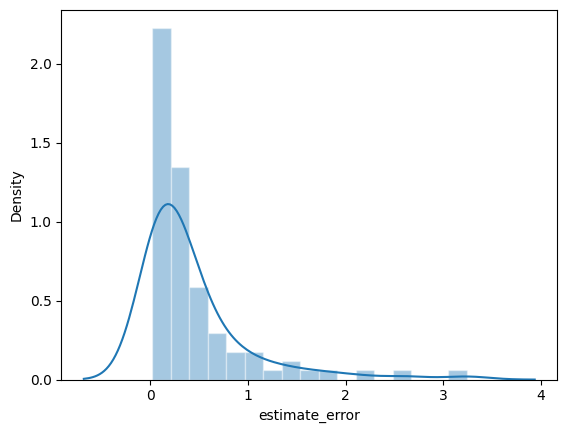

In [78]:
ax = sns.histplot(df_estimate['estimate_error'], kde=True, stat="density", kde_kws=dict(cut=3),
                  alpha=.4, edgecolor=(1, 1, 1, .4),)

In [80]:
# investigate on the options with error larger than 1% 
df_large_error = df_estimate[(df_estimate['estimate_error']>1)] 

In [88]:
df_large_error

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,estimate,estimate_error
80,SPY230818C00420000,2023-08-17 4:13PM EDT,420.0,16.55,16.36,16.53,-3.42,-17.13%,22471,48732,45.61%,16.360190,1.037944
81,SPY230818C00421000,2023-08-17 3:59PM EDT,421.0,15.71,15.37,15.53,-3.63,-18.77%,34,5001,43.26%,15.360362,1.104391
82,SPY230818C00422000,2023-08-17 4:09PM EDT,422.0,14.32,14.37,14.54,-4.38,-23.42%,60,7487,41.41%,14.360533,1.249724
83,SPY230818C00423000,2023-08-17 3:48PM EDT,423.0,13.54,13.37,13.54,-4.01,-22.85%,15,7402,39.06%,13.360704,1.341963
84,SPY230818C00424000,2023-08-17 3:48PM EDT,424.0,12.58,12.38,12.54,-3.72,-22.82%,38,3867,36.72%,12.360876,1.449122
85,SPY230818C00425000,2023-08-17 3:53PM EDT,425.0,12.04,11.38,11.55,-3.31,-21.56%,293,10124,34.67%,11.361047,1.663161
86,SPY230818C00426000,2023-08-17 4:14PM EDT,426.0,10.55,10.39,10.55,-4.06,-27.79%,103,4113,32.28%,10.361219,1.821995
87,SPY230818C00427000,2023-08-17 3:56PM EDT,427.0,10.02,9.40,9.56,-3.83,-27.65%,86,7526,30.13%,9.361391,2.121576
88,SPY230818C00428000,2023-08-17 4:05PM EDT,428.0,8.38,8.41,8.58,-4.28,-33.81%,245,6122,28.17%,8.361563,2.612396
89,SPY230818C00429000,2023-08-17 3:49PM EDT,429.0,7.55,7.44,7.60,-6.14,-44.85%,84,4664,26.12%,7.361735,3.236536


In [95]:
#error

climbup = round((436.29-429.0)/436.29*100,2)

print(f' The climb up rate is: {climbup}% in 1 market day which is relatively a difficult feat for SPY ETF.')

 The climb up rate is: 1.67% in 1 market day which is relatively a difficult feat for SPY ETF.
